In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy.stats import norm

In [2]:
import pandas as pd
df = pd.read_csv('pendulumData.csv')
g = df['g (m/s2)'].to_numpy()
g_f = g[~ np.isnan(g)]
g_f = np.delete(g_f, 4)
print(g_f)
mean = np.mean(g_f)
print(mean)
samplestd = np.std(g_f, ddof=1)
print(samplestd)
N = len(g_f)
print(N)
meanstd = samplestd/(N**0.5)
print(meanstd)

[ 9.83    9.06    9.79    9.882   9.807   9.28    9.811   9.26    9.8095
  9.68    9.795   9.62    9.779  10.63    9.565   9.857   9.56    9.815
  9.8079  9.8     9.76    9.75    9.8608  9.8078  9.685  10.72    9.23
  9.933   9.766   9.79    9.7     9.7     9.1     9.7    11.      9.8
  9.7    10.3     9.77    9.3    10.5     9.05    9.779   9.821   9.78
  9.2    10.     10.1    10.19   12.22   10.176   9.67    9.7     8.68
  9.87    7.73    8.19    9.594   9.78   10.56    9.63    9.9     9.73
  8.8     9.1   ]
9.731707692307692
0.6041559658181437
65
0.07493632487074035


<Figure size 432x288 with 0 Axes>

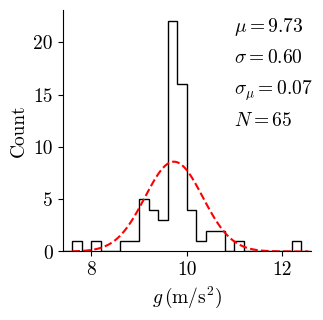

In [8]:
plt.clf()
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'cmr10', 'mathtext.fontset': 'cm'})
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(g_f, bins=[7.4+0.2*i for i in range(27)], edgecolor='black', linewidth=1, color='white', histtype='step')
x = [7.6+0.05*i for i in range(100)]
plt.plot(x, N*0.2*norm.pdf(x, loc=mean, scale=samplestd), linestyle='dashed', linewidth=1.5, color='red')
plt.xlabel(r'$g \, (\mathrm{m}/\mathrm{s}^2)$')
plt.ylabel('Count')
plt.xlim([7.4, 12.6])
#plt.title('Measured value of acceleration due to gravity')
plt.text(11, 21, r'$\mu = 9.73$', horizontalalignment='left')
plt.text(11, 18, r'$\sigma = 0.60$', horizontalalignment='left')
plt.text(11, 15, r'$\sigma_\mu = 0.07$', horizontalalignment='left')
plt.text(11, 12, r'$N = 65$', horizontalalignment='left')
fig.set_size_inches(3.2, 3.2)
fig.set_dpi(100)
plt.savefig('hist.png', bbox_inches='tight', pad_inches=0)